In [1]:
import cv2 as cv
import dlib

In [13]:
def show_feed(feed, title, wait=1, rewind=False):
    retval, feed_frame = feed.read()
    while retval:
        cv.namedWindow(title, cv.WINDOW_AUTOSIZE)
        cv.setWindowProperty(title, cv.WND_PROP_VISIBLE, 1)
        cv.imshow(title, feed_frame)
        
        key_input = cv.waitKey(wait)
        if key_input != -1:
            break;
        
        retval, feed_frame = feed.read()
    
    try:
        if rewind: # Rewind VideoCapture object for video files
            feed.set(cv.CAP_PROP_POS_MSEC, 0.0)
        cv.destroyWindow(title)
    except:
        print("'" + title + "' not found")

In [4]:
webcam_index = 0
webcam = cv.VideoCapture(webcam_index)

In [6]:
show_feed(webcam, "My Webcam")

In [ ]:
# webcam.release() # dispose of the VideoCapture object
# webcam.open() # create the VideoCapture object again

This is me on the webcam feed

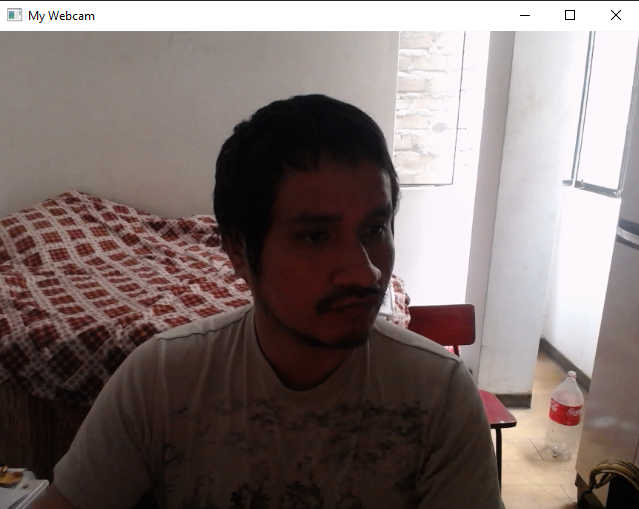

We can also check the dimensions of our webcam feed:

In [13]:
print("Webcam height: ", webcam.get(cv.CAP_PROP_FRAME_HEIGHT))
print("Webcam width: ", webcam.get(cv.CAP_PROP_FRAME_WIDTH))

Webcam height:  480.0
Webcam width:  640.0


### Loading a video
We will load a video and send in the appropriate wait time between frames

In [11]:
file = "videos/stock-video-480.mp4"
ffmpeg_api = cv.CAP_FFMPEG
video_file = cv.VideoCapture(file, ffmpeg_api)
frame_wait = int(1000/video_file.get(cv.CAP_PROP_FPS)) # Approximate for 30 frames per second
rewind = True

In [16]:
show_feed(video_file, "My video", frame_wait, rewind)

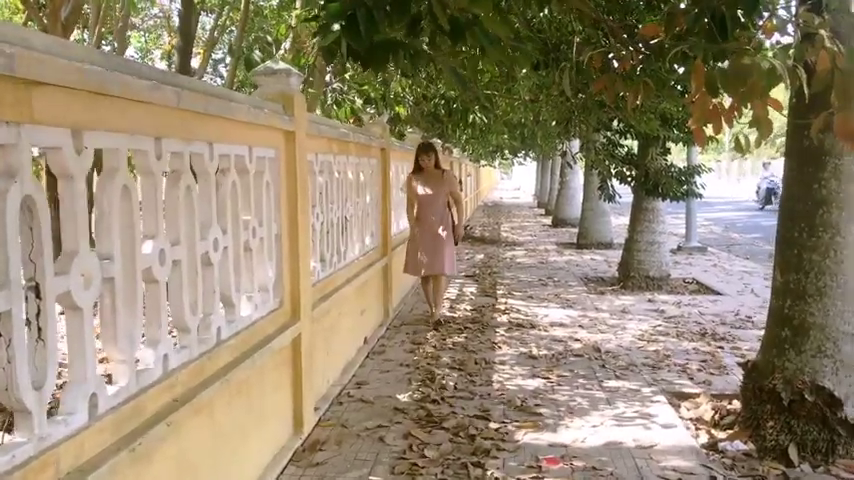

In [10]:
print("Video height: ", video_file.get(cv.CAP_PROP_FRAME_HEIGHT))
print("Video width: ", video_file.get(cv.CAP_PROP_FRAME_WIDTH))

Video height:  480.0
Video width:  854.0


Our video is able to load and be showned by displaying each frame at a time

### Short video for testing

In [7]:
file_short = "videos/stock-video-short.mp4"
video_file_short = cv.VideoCapture(file_short, ffmpeg_api)

In [8]:
show_feed(video_file_short, "My video", frame_wait, rewind)

### Codes for the VideoCapture object formats

In [89]:
print(webcam.get(cv.CAP_PROP_FORMAT))
print(video_file_short.get(cv.CAP_PROP_FORMAT))

-1.0
0.0
